In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import zscore

In [3]:
col=["Sample code number ","Clump Thickness","Uniformity of Cell Size","Uniformity of Cell Shape","Marginal Adhesion",
    "Single Epithelial Cell Size","Bare Nuclei", "Bland Chromatin", "Normal Nucleoli"  ,"Mitoses", "Class"]
len(col)

11

In [4]:
df=pd.read_csv("DSBDALExam DataSets/BreastCancer/BreastCancerWc.csv",names=col)

In [5]:
df["Bare Nuclei"].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [7]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [8]:
df.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [9]:
df.groupby("Class").count()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
Class,,,,,,,,,,
2,458,458,458,458,458,458,458,458,458,458
4,241,241,241,241,241,241,241,241,241,241


In [10]:
df["Bare Nuclei"].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [11]:
df["Bare Nuclei"]=df["Bare Nuclei"].replace("?",-1)
df["Bare Nuclei"].unique()

array(['1', '10', '2', '4', '3', '9', '7', -1, '5', '8', '6'],
      dtype=object)

In [12]:
df=df.astype('int64')

In [13]:
df.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [14]:
df.abs()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [15]:
df=abs(df)

In [16]:
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [17]:
import seaborn as sb

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Clump Thickness'>

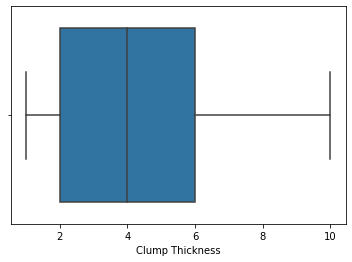

In [18]:
sb.boxplot(df["Clump Thickness"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Uniformity of Cell Shape'>

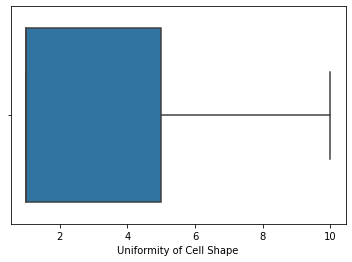

In [19]:
sb.boxplot(df["Uniformity of Cell Shape"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Uniformity of Cell Size'>

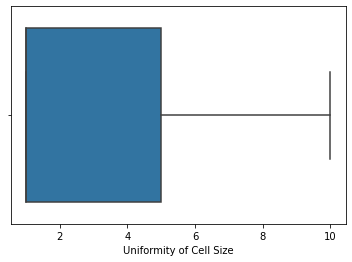

In [20]:
sb.boxplot(df["Uniformity of Cell Size"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marginal Adhesion'>

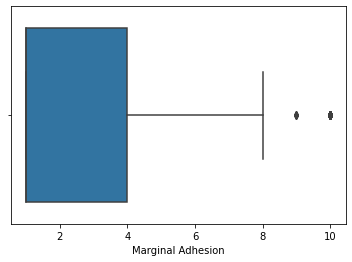

In [21]:
sb.boxplot(df["Marginal Adhesion"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Single Epithelial Cell Size'>

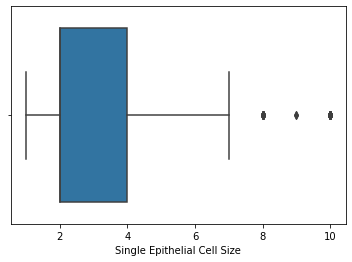

In [22]:
sb.boxplot(df["Single Epithelial Cell Size"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bare Nuclei'>

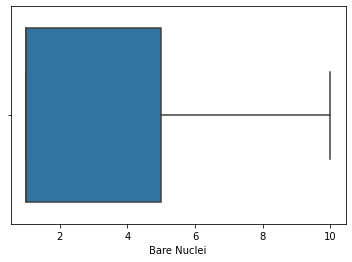

In [23]:
sb.boxplot(df["Bare Nuclei"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Mitoses,Class
Bland Chromatin,,,,,,,,,,
1,152,152,152,152,152,152,152,152,152,152
2,166,166,166,166,166,166,166,166,166,166
3,165,165,165,165,165,165,165,165,165,165
4,40,40,40,40,40,40,40,40,40,40
5,34,34,34,34,34,34,34,34,34,34
6,10,10,10,10,10,10,10,10,10,10
7,73,73,73,73,73,73,73,73,73,73
8,28,28,28,28,28,28,28,28,28,28
9,11,11,11,11,11,11,11,11,11,11


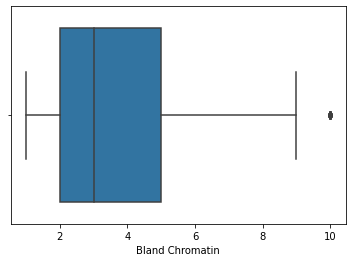

In [24]:
sb.boxplot(df["Bland Chromatin"])
df.groupby("Bland Chromatin").count()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Normal Nucleoli'>

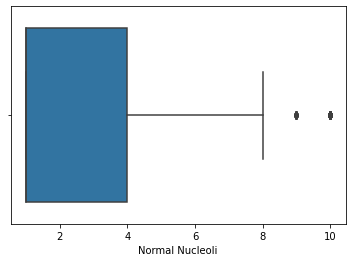

In [25]:
sb.boxplot(df["Normal Nucleoli"])

In [26]:
z_scores = zscore(df)
# calculate z-scores of `df`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
filt=(abs_z_scores > -3).all(axis=1)
df = df[filtered_entries]

In [27]:
y=df["Class"]

In [28]:
df=df.drop("Class",axis=1)

In [29]:
from sklearn.model_selection import train_test_split


In [30]:
train_x,test_x,train_y,test_y=train_test_split(df,y,test_size=0.2)

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
sc=MinMaxScaler()

In [33]:
sc.fit(df)

MinMaxScaler()

In [34]:
train_x=sc.transform(train_x)

In [35]:
test_x=sc.transform(test_x)

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
model=GaussianNB()

In [38]:
model.fit(train_x,train_y)

GaussianNB()

In [39]:
y_pred=model.predict(test_x)

In [40]:
model.score(test_x,test_y)

0.9615384615384616

In [41]:
from sklearn.metrics import classification_report
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           2       1.00      0.95      0.97        95
           4       0.88      1.00      0.93        35

    accuracy                           0.96       130
   macro avg       0.94      0.97      0.95       130
weighted avg       0.97      0.96      0.96       130

